## Exercise: Clustering with Airline Data

Market segmentation is a strategy that divides a broad target market of customers into smaller, more similar groups, and then designs a marketing strategy specifically for each group. Clustering is a common technique for market segmentation since it automatically finds similar groups given a data set.

In this notebook, we'll see how clustering can be used to find similar groups of customers who belong to an airline's frequent flyer program. The airline is trying to learn more about its customers so that it can target different customer segments with different types of mileage offers.

We will be focusing on Hierarchical clustering to find clusters of data. Most of the exercises are similar to what we have in labs and practices while some of them might be a bit challenging. Explore the web to find the commands needed to perform a few exercises. We will use the file AirlinesCluster.csv that contains information on 3,999 members of the frequent flyer program. The data comes from the textbook "Data Mining for Business Intelligence," by Galit Shmueli, Nitin R. Patel, and Peter C. Bruce.

There are seven different variables in the dataset, as described below:

- Balance = number of miles eligible for award travel
- QualMiles = number of miles qualifying for TopFlight status
- BonusMiles = number of miles earned from non-flight bonus transactions in the past 12 months
- BonusTrans = number of non-flight bonus transactions in the past 12 months
- FlightMiles = number of flight miles in the past 12 months
- FlightTrans = number of flight transactions in the past 12 months
- DaysSinceEnroll = number of days since enrolled in the frequent flyer program

In [1]:
import numpy as np
import pandas as pd
from sklearn import cluster
from matplotlib import pyplot
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as hca
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from pylab import *

%matplotlib inline

In [2]:
airlines_data = pd.read_csv("../../../../datasets/DSA-8630/AirlinesCluster.csv")
airlines_data[:4]

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
0,28143,0,174,1,0,0,7000
1,19244,0,215,2,0,0,6968
2,41354,0,4123,4,0,0,7034
3,14776,0,500,1,0,0,6952


In [3]:
airlines_data.shape

(3999, 7)

#### Normalize the data

Why is it important to normalize the data before clustering?

- If we don't normalize the data, the variables that are on a larger scale will contribute much more to the distance calculation, and thus will dominate the clustering.


**Activity 1: ** Create a normalized data frame called "airlinesNorm" using the StandardScaler() function

In [4]:
# Your code for activity 1 goes here...

stscaler = StandardScaler().fit(airlines_data)
airlinesNorm = stscaler.fit_transform(airlines_data)

**Activity 2: ** Compute the distances between data points (using euclidean distance) and then run the Hierarchical clustering algorithm (using method="ward") on the normalized data

In [5]:
# Your code for activity 2 goes here...

link_matrix=hca.linkage(airlinesNorm,metric="euclidean",method="ward")

In [6]:
link_matrix[0]

array([  3.37000000e+03,   3.87600000e+03,   0.00000000e+00,
         2.00000000e+00])

In [7]:
link_matrix[1]

array([  1.82600000e+03,   2.12100000e+03,   1.88561158e-03,
         2.00000000e+00])

**Activity 3: ** Plot the dendogram

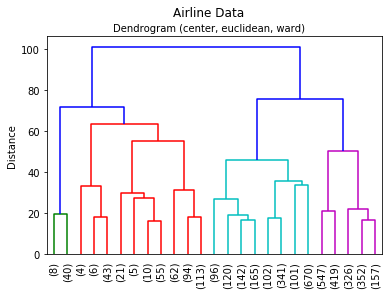

In [8]:
# Your code for activity 3 goes here...
plt=hca.dendrogram(link_matrix,truncate_mode="lastp",p=25)
xticks(rotation=90)
ylabel("Distance")
figtext(0.5,0.95,"Airline Data",ha="center",fontsize=12)
figtext(0.5,0.90,"Dendrogram (center, euclidean, ward)",ha="center",fontsize=10)

### knowing K (number of clusters)

**Activity 4: ** Plot the same dendogram again but draw a line on the dendogram to show 5 clusters are formed when performing a cut on dendogram as shown below.

**Hint: ** Use fig, axes = pyplot.subplots(1, 1, figsize=(10, 10)) to create the figure and use an axes object to plot a horizontal line.
<img src="../Images/dendogram.PNG">

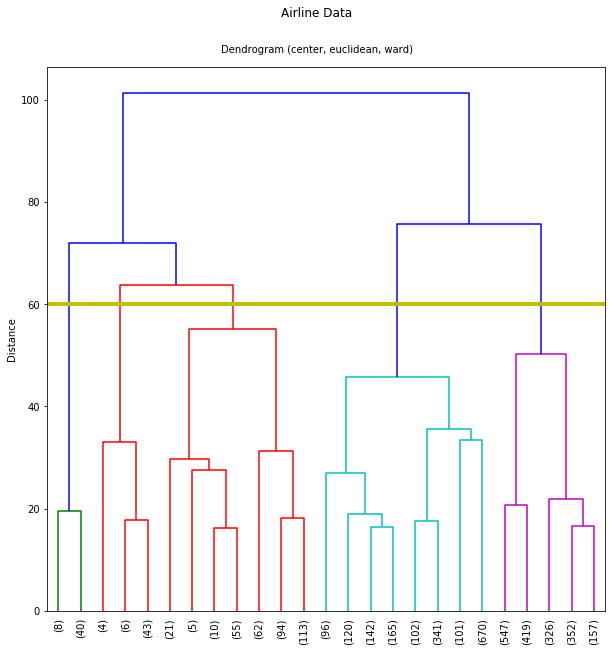

In [9]:
# Your code for activity 4 goes here...
fig, axes = pyplot.subplots(1, 1, figsize=(10, 10))
axhline(y=60, linewidth=4, color='y')
plt=hca.dendrogram(link_matrix,truncate_mode="lastp",p=25)
xticks(rotation=90)
ylabel("Distance")
figtext(0.5,0.95,"Airline Data",ha="center",fontsize=12)
figtext(0.5,0.90,"Dendrogram (center, euclidean, ward)",ha="center",fontsize=10)


**Activity 5: ** Print the number of samples in each of the 5 clusters

In [10]:
# Your code for activity 5 goes here...

from scipy.cluster.hierarchy import fcluster
max_d = 60
clusters = fcluster(link_matrix, max_d, criterion='distance')
clusters

array([5, 5, 5, ..., 5, 5, 5], dtype=int32)

In [11]:
max(clusters)

5

In [12]:
unique,counts=np.unique(clusters,return_counts=True)
print(unique,counts)

[1 2 3 4 5] [  48   53  360 1737 1801]


In [13]:
from scipy.stats import itemfreq
itemfreq(clusters)

array([[   1,   48],
       [   2,   53],
       [   3,  360],
       [   4, 1737],
       [   5, 1801]])

**Activity 6: ** Plot the variables BonusMiles on the X-axis and BonusTrans on the Y-axis with clusters as a color reference. use the parameter cmap='prism' to display the colors better.

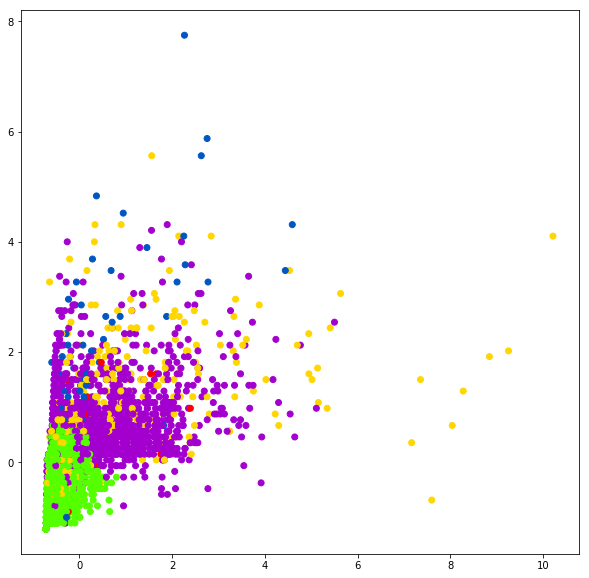

In [14]:
# Your code for activity 6 goes here...
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.scatter(airlinesNorm[:,2], airlinesNorm[:,3], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.show()

**Activity 7: ** Create a new column called cluster in the airlines_data dataframe using clusters that were generated in activity 5. Group the data according to the cluster column and store the result in a variable called grouped. 

In [15]:
# Your code for activity 7 goes here...
airlines_data["cluster"] = clusters
airlines_data.head()

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll,cluster
0,28143,0,174,1,0,0,7000,5
1,19244,0,215,2,0,0,6968,5
2,41354,0,4123,4,0,0,7034,5
3,14776,0,500,1,0,0,6952,5
4,97752,0,43300,26,2077,4,6935,3


In [16]:
airlines_data.shape

(3999, 8)

In [17]:
airlines_data.groupby('cluster')['cluster'].sum()

cluster
1      48
2     106
3    1080
4    6948
5    9005
Name: cluster, dtype: int32

In [18]:
grouped = airlines_data.groupby(["cluster"])

In [19]:
len(grouped)

5

**Activity 8: ** Split the airlines data into 5 new dataframes according to the clusters each row is assigned to.

In [20]:
# Your code for activity 8 goes here...

cluster1 = airlines_data[airlines_data.cluster == 1]
cluster2 = airlines_data[airlines_data.cluster == 2]
cluster3 = airlines_data[airlines_data.cluster == 3]
cluster4 = airlines_data[airlines_data.cluster == 4]
cluster5 = airlines_data[airlines_data.cluster == 5]

In [21]:
cluster1.head()

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll,cluster
70,84409,5031,15436,16,1150,4,7766,1
307,383030,2998,8001,25,3226,15,7326,1
335,278457,6727,57313,27,1000,2,7101,1
420,529886,7210,23866,26,7741,15,8296,1
589,133445,8264,3375,13,0,0,6492,1


In [22]:
cluster2.head()

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll,cluster
65,53914,0,33767,45,5550,29,6826,2
135,259484,1776,19172,26,7172,23,6723,2
323,278727,0,21666,19,9166,16,7155,2
475,171509,0,40090,55,6381,23,8151,2
511,9800,589,10348,34,3000,25,6651,2


In [23]:
cluster3.head()

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll,cluster
4,97752,0,43300,26,2077,4,6935,3
8,443003,0,1753,43,3850,12,6948,3
22,20584,0,3450,11,3450,11,6884,3
35,123759,0,50572,23,2500,5,7865,3
42,60313,0,10000,26,3250,9,7829,3


In [24]:
cluster4.head()

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll,cluster
6,84914,0,27482,25,0,0,6994,4
9,104860,0,28426,28,1150,3,6931,4
10,40091,0,7278,10,0,0,6959,4
11,96522,0,61105,19,0,0,6924,4
12,43382,0,11150,20,0,0,6924,4


In [25]:
cluster5.head()

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll,cluster
0,28143,0,174,1,0,0,7000,5
1,19244,0,215,2,0,0,6968,5
2,41354,0,4123,4,0,0,7034,5
3,14776,0,500,1,0,0,6952,5
5,16420,0,0,0,0,0,6942,5


Creating a list below with the five new clusters formed. 

In [26]:
clt = [cluster1, cluster2, cluster3, cluster4, cluster5]

**Activity 9: ** Compare the mean values in each of the variables for the 5 clusters. You may want to compute the average values of the unnormalized data(airlines_data) so that it is easier to interpret.

**Sample output: **

dimensions of cluster:  (48, 8)

Balance:  135318

QualMiles:  5870

BonusMiles:  16406

BonusTrans:  13

FlightMiles:  975

FlightTrans:  3

DaysSinceEnroll:  4320

cluster:  1

In [56]:
# Supress scientific notation. Output numbers look neat without 10 digit long precision values
np.set_printoptions(suppress=True)

# Your code for activity 9 goes here..
import scipy
for x in clt:
    print('dimensions of cluster',(x).shape)
    print(scipy.mean(x))
print()

dimensions of cluster (48, 8)
Balance            135318.020833
QualMiles            5870.062500
BonusMiles          16406.000000
BonusTrans             12.645833
FlightMiles           974.770833
FlightTrans             3.270833
DaysSinceEnroll      4320.375000
cluster                 1.000000
dtype: float64
dimensions of cluster (53, 8)
Balance            154830.603774
QualMiles             490.716981
BonusMiles          32137.018868
BonusTrans             33.471698
FlightMiles          8752.622642
FlightTrans            23.679245
DaysSinceEnroll      4046.830189
cluster                 2.000000
dtype: float64
dimensions of cluster (360, 8)
Balance            204316.227778
QualMiles             144.711111
BonusMiles          36265.022222
BonusTrans             19.802778
FlightMiles          2286.719444
FlightTrans             6.744444
DaysSinceEnroll      4744.158333
cluster                 3.000000
dtype: float64
dimensions of cluster (1737, 8)
Balance            79910.013241
QualMile

**Activity 10: ** Write your conclusions based on the average values for each variable in each cluster. 

Cluster 1:
This cluster is the smallest of the set. Balance avg seems to fall right in the middle of the group. This cluster has the highest avg of Qualmiles in the program. The BonusMiles and BonusTrans avgs vs the actual FlightMiles and FlightTrans suggests that this cluster is more interested in non-flight incentives. I would guess this activity relates to the medium-ish avg balance given the small size of the cluster. Althought not the highest avg, the DaysSinceEnroll indicates this cluster has been using the program for quite some time.

Cluster 2:
This cluster is the second to smallest of the set. This cluster's avg Balance is the second largest. The Qualmiles avg, however is suprisingly low given such a high balance. Alternatively, the BonusMiles and BonusTrans avgs are quite high, BonusTrans is the highest of the set. This cluster seems to be the most interested in non-flight transactions. This cluster has the highest avg FlightMiles and highest avg FlightTrans of the group. This cluster looks like power users. It's the second smallest cluster, but uses the program more extensively than the other clusters.

Cluster 3:
This cluster is the third largest of the bunch and has the highest avg Balance. This cluster has also been enrolled in the program the longest. This cluster also has third highest avg of QualMiles, but the highest avg BonusMiles. Avg FlightMiles is the second highest. I would guess that this is a loyal group of customers in the program that saves up Balance with a mix of FlightMiles and on non-flight bonuses. They probably rely more heavily on non-flight bonuses as the QualMiles avg is fairly low.

Cluster 4:
For having been enrolled in the program for a while (DaysSinceEnroll avg is second highest), it's surprising that the FlightMiles and QualMiles is so low. This cluster does not seem to travel much, but does seem to take advantage of non-flight BonusMiles. Their BonusMiles avg is the second highest of the set. BonusTrans avg is the third highest of the bunch. Again, this seems to suggest that this cluster is more interested in non-flight bonuses.

Cluster 5:
This cluster is the largest and the newest of the group (DaysSinceEnroll is the smallest avg of the set). This may also be the reason for having the smallest Balance avg as well. This group flies the least and does not seem to have any QualMiles. Out of all of the clusters, this group needs to be marketed to the most.